## Osnovni Primjeri Pandasa

Ova bilježnica će vas provesti kroz neke vrlo osnovne koncepte Pandasa. Počet ćemo s uvozom tipičnih biblioteka za znanost o podacima:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serija

Serija je poput liste ili 1D-niza, ali s indeksom. Sve operacije su usklađene s indeksom.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Jedna od čestih upotreba serija su **vremenske serije**. U vremenskim serijama, indeks ima posebnu strukturu - obično raspon datuma ili vremenskih oznaka. Takav indeks možemo stvoriti pomoću `pd.date_range`.

Pretpostavimo da imamo seriju koja prikazuje količinu proizvoda kupljenog svaki dan, i znamo da svake nedjelje također trebamo uzeti jedan artikl za sebe. Evo kako to možemo modelirati koristeći serije:


Length of index is 366


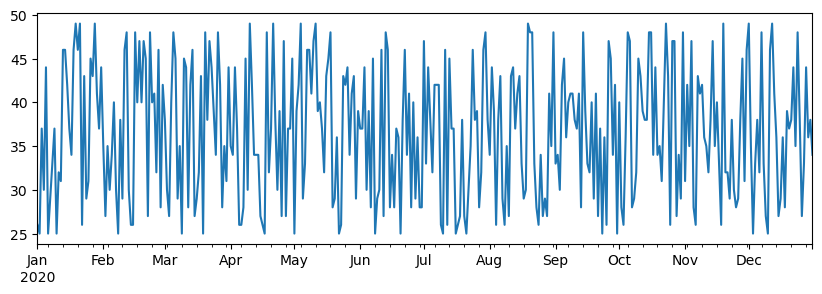

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Kao što možete vidjeti, ovdje imamo problema, jer se u tjednoj seriji dani koji nisu spomenuti smatraju nedostajućima (`NaN`), a dodavanje `NaN` broju daje `NaN`. Kako bismo dobili točan rezultat, moramo odrediti `fill_value` prilikom zbrajanja serija:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


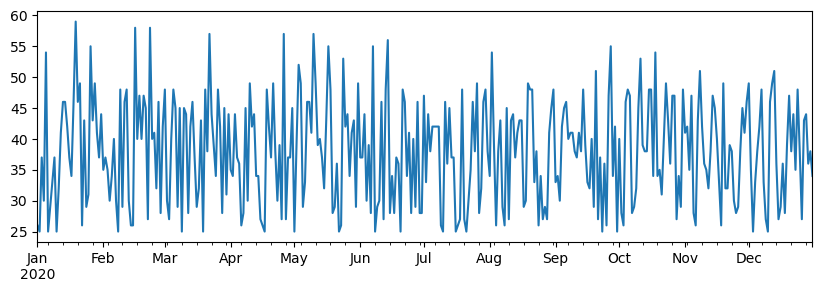

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

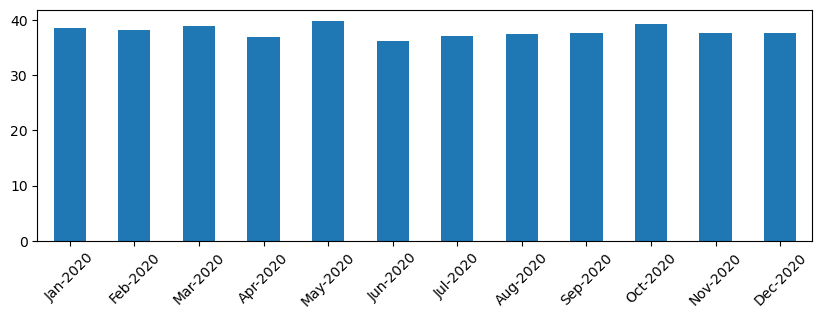

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame je zapravo skup serija s istim indeksom. Možemo kombinirati nekoliko serija zajedno u DataFrame. S obzirom na serije `a` i `b` definirane gore:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Također možemo koristiti Series kao stupce i odrediti nazive stupaca koristeći rječnik:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Isti rezultat može se postići transponiranjem (i zatim preimenovanjem stupaca, kako bi odgovarali prethodnom primjeru):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Odabir stupaca** iz DataFramea može se napraviti ovako:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Odabir redaka** na temelju izraza za filtriranje:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Način na koji to funkcionira je da izraz `df['A']<5` vraća boolean seriju, koja pokazuje je li izraz `True` ili `False` za svaki element serije. Kada se serija koristi kao indeks, vraća podskup redaka u DataFrameu. Stoga nije moguće koristiti proizvoljan Python boolean izraz, na primjer, pisanje `df[df['A']>5 and df['A']<7]` bilo bi pogrešno. Umjesto toga, trebali biste koristiti posebnu `&` operaciju na boolean serijama:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Stvaranje novih izračunljivih stupaca**. Lako možemo stvoriti nove izračunljive stupce za naš DataFrame koristeći intuitivne izraze. Kod ispod izračunava odstupanje A od njegove srednje vrijednosti.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Ono što se zapravo događa jest da računamo niz, a zatim taj niz dodjeljujemo lijevoj strani, stvarajući drugi stupac.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Odabir redaka na temelju brojeva** može se izvršiti pomoću konstrukta `iloc`. Na primjer, za odabir prvih 5 redaka iz DataFrame-a:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Grupiranje** se često koristi za dobivanje rezultata sličnog *pivot tablicama* u Excelu. Pretpostavimo da želimo izračunati srednju vrijednost stupca `A` za svaki dani broj `LenB`. Tada možemo grupirati naš DataFrame po `LenB` i pozvati `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Ako trebamo izračunati srednju vrijednost i broj elemenata u grupi, tada možemo koristiti složeniju funkciju `aggregate`:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Ispis i Grafički Prikaz

Data Scientist često mora istraživati podatke, stoga je važno moći ih vizualizirati. Kada je DataFrame velik, često želimo samo provjeriti radimo li sve ispravno ispisivanjem prvih nekoliko redaka. To se može učiniti pozivanjem `df.head()`. Ako ga pokrećete iz Jupyter Notebooka, ispisat će DataFrame u lijepom tabličnom obliku.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Također smo vidjeli upotrebu funkcije `plot` za vizualizaciju nekih stupaca. Iako je `plot` vrlo koristan za mnoge zadatke i podržava različite vrste grafova putem parametra `kind=`, uvijek možete koristiti osnovnu biblioteku `matplotlib` za crtanje nečeg složenijeg. Detaljno ćemo obraditi vizualizaciju podataka u zasebnim lekcijama tečaja.


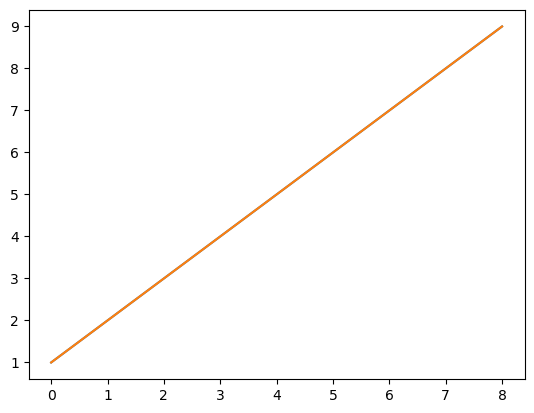

In [61]:
df['A'].plot()
plt.show()

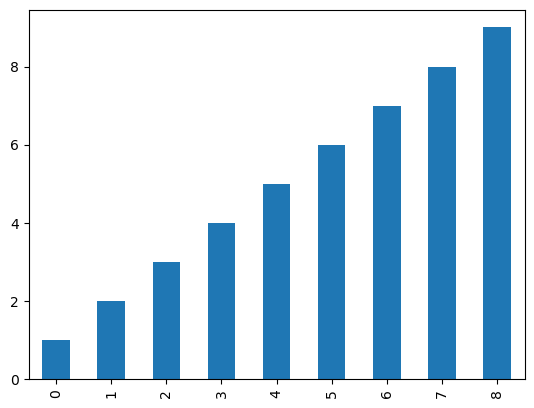

In [63]:
df['A'].plot(kind='bar')
plt.show()

Ovaj pregled pokriva najvažnije pojmove Pandasa, no biblioteka je vrlo bogata i nema granica za ono što možete učiniti s njom! Sada primijenimo ovo znanje za rješavanje konkretnog problema.



---

**Odricanje od odgovornosti**:  
Ovaj dokument je preveden pomoću AI usluge za prevođenje [Co-op Translator](https://github.com/Azure/co-op-translator). Iako nastojimo osigurati točnost, imajte na umu da automatski prijevodi mogu sadržavati pogreške ili netočnosti. Izvorni dokument na izvornom jeziku treba smatrati autoritativnim izvorom. Za ključne informacije preporučuje se profesionalni prijevod od strane čovjeka. Ne preuzimamo odgovornost za bilo kakva nesporazuma ili pogrešna tumačenja koja proizlaze iz korištenja ovog prijevoda.
